In [2]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras

In [3]:
data = np.load(r'data\train_balanced.npy', allow_pickle=True)
split = int(data.shape[0] * 0.8)
width = 480
height = 640

train = data[:-split]
test = data[-split:]

X_train = np.array([i[0] for i in train]).reshape(-1, width, height, 1)
Y_train = np.array([i[1] for i in train])
X_test = np.array([i[0] for i in test]).reshape(-1, width, height, 1)
Y_test =  np.array([i[1] for i in test])

In [6]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [7]:
X_train.shape, Y_train.shape

((1329, 480, 640, 1), (1329, 9))

In [8]:
import tensorflow_hub as hub

model_url = "https://tfhub.dev/tensorflow/resnet_50/classification/1"
base_model = hub.KerasLayer(model_url, trainable=False)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(width, height, 1)),
    tf.keras.layers.Resizing(224, 224, interpolation='bilinear'),
    tf.keras.layers.Lambda(lambda x: tf.tile(x, [1, 1, 1, 3])),
    base_model,
    tf.keras.layers.Dense(9, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test))
model.save("model.h5")

Epoch 1/50
42/42 [==============================] - 319s 8s/step - loss: 2.1822 - accuracy: 0.1512 - val_loss: 2.1710 - val_accuracy: 0.1503
Epoch 2/50
42/42 [==============================] - 309s 7s/step - loss: 2.1608 - accuracy: 0.1415 - val_loss: 2.1517 - val_accuracy: 0.1310
Epoch 3/50
42/42 [==============================] - 309s 8s/step - loss: 2.1429 - accuracy: 0.1550 - val_loss: 2.1358 - val_accuracy: 0.1310
Epoch 4/50
42/42 [==============================] - 308s 7s/step - loss: 2.1282 - accuracy: 0.1610 - val_loss: 2.1222 - val_accuracy: 0.1405
Epoch 5/50
42/42 [==============================] - 308s 7s/step - loss: 2.1157 - accuracy: 0.1633 - val_loss: 2.1115 - val_accuracy: 0.1405
Epoch 6/50
42/42 [==============================] - 308s 7s/step - loss: 2.1051 - accuracy: 0.1633 - val_loss: 2.1021 - val_accuracy: 0.1405
Epoch 7/50
42/42 [==============================] - 308s 7s/step - loss: 2.0963 - accuracy: 0.1633 - val_loss: 2.0938 - val_accuracy: 0.1405
Epoch 8/50
42

Resnet50 no scaling: loss: 2.0325 - accuracy: 0.1685 - val_loss: 2.0352 - val_accuracy: 0.1575

In [15]:
import matplotlib.pyplot as plt
def plot_hist(history):
  plt.plot(history.history['accuracy'], label="accuracy")
  plt.plot(history.history['val_accuracy'], label="val accuracy")

  plt.xlabel('epoch')
  plt.legend()
  plt.show()
  plt.ylabel("accuracy")
#plot_hist(history)

In [10]:
history2 = model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
42/42 [==============================] - 565s 14s/step - loss: 2.1832 - accuracy: 0.1828 - val_loss: 2.1721 - val_accuracy: 0.1842
Epoch 2/50
42/42 [==============================] - 311s 8s/step - loss: 2.1605 - accuracy: 0.1979 - val_loss: 2.1518 - val_accuracy: 0.1872
Epoch 3/50
42/42 [==============================] - 309s 7s/step - loss: 2.1409 - accuracy: 0.2122 - val_loss: 2.1341 - val_accuracy: 0.1885
Epoch 4/50
42/42 [==============================] - 308s 7s/step - loss: 2.1241 - accuracy: 0.2137 - val_loss: 2.1192 - val_accuracy: 0.1904
Epoch 5/50
42/42 [==============================] - 309s 7s/step - loss: 2.1093 - accuracy: 0.2152 - val_loss: 2.1061 - val_accuracy: 0.1857
Epoch 6/50
42/42 [==============================] - 308s 7s/step - loss: 2.0963 - accuracy: 0.2220 - val_loss: 2.0943 - val_accuracy: 0.1910
Epoch 7/50
42/42 [==============================] - 309s 7s/step - loss: 2.0846 - accuracy: 0.2257 - val_loss: 2.0842 - val_accuracy: 0.1874
Epoch 8/50
4

NameError: name 'plot_hist' is not defined

In [23]:
model

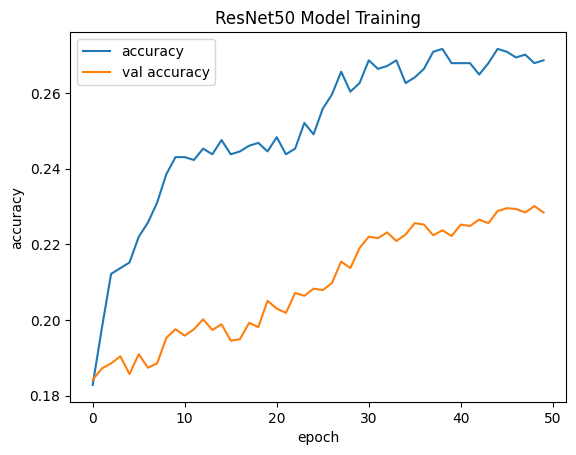

In [19]:
plt.title("ResNet50 Model Training")
plt.plot(history2.history['accuracy'], label="accuracy")
plt.plot(history2.history['val_accuracy'], label="val accuracy")
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.legend()
plt.show()
model.save("model2.keras")

Resnet50 scaling: loss: 1.9209 - accuracy: 0.2686 - val_loss: 1.9478 - val_accuracy: 0.2284

We got a 73% increase in accuracy just by scaling down the images

In [21]:
import tensorflow_hub as hub

model_url = "https://tfhub.dev/tensorflow/resnet_50/classification/1"
base_model = hub.KerasLayer(model_url, trainable=True)

model3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(width, height, 1)),
    tf.keras.layers.Resizing(224, 224, interpolation='bilinear'),
    tf.keras.layers.Lambda(lambda x: tf.tile(x, [1, 1, 1, 3])),
    base_model,
    tf.keras.layers.Dense(9, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history3 = model3.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
42/42 [==============================] - 798s 19s/step - loss: 2.5263 - accuracy: 0.1558 - val_loss: 2.4084 - val_accuracy: 0.1705
Epoch 2/50
42/42 [==============================] - 552s 13s/step - loss: 2.3479 - accuracy: 0.1723 - val_loss: 2.3131 - val_accuracy: 0.1503
Epoch 3/50
42/42 [==============================] - 543s 13s/step - loss: 2.2731 - accuracy: 0.1798 - val_loss: 2.2493 - val_accuracy: 0.1405
Epoch 4/50
42/42 [==============================] - 542s 13s/step - loss: 2.2195 - accuracy: 0.1798 - val_loss: 2.1933 - val_accuracy: 0.1616
Epoch 5/50
42/42 [==============================] - 543s 13s/step - loss: 2.1773 - accuracy: 0.1806 - val_loss: 2.1792 - val_accuracy: 0.1492
Epoch 6/50
42/42 [==============================] - 542s 13s/step - loss: 2.1546 - accuracy: 0.1663 - val_loss: 2.1511 - val_accuracy: 0.1405
Epoch 7/50
42/42 [==============================] - 543s 13s/step - loss: 2.1492 - accuracy: 0.1595 - val_loss: 2.1406 - val_accuracy: 0.1411
Epoch 

KeyboardInterrupt: 

In [ ]:
model3.save("model3.h5")
model3.save("model3.keras")

In [ ]:
plt.title("ResNet50 Model Training")
plt.plot(history3.history['accuracy'], label="accuracy")
plt.plot(history3.history['val_accuracy'], label="val accuracy")
plt.xlabel('epoch')
plt.ylabel("accuracy")
plt.legend()
plt.show()

Resnet50 scaling + trainable pretrained layers (ImageNet):